In [4]:
#### Importing libraries
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('deeplearning/17k_smalldata.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'clean_text', 'sentiment'], dtype='object')


## Splitting data into test and training

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['clean_text','sentiment']], test_size=0.02)


In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Activation,Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional

Using MXNet backend


In [6]:
from keras.optimizers import adam

## Defining Params

In [7]:
# # Embedding
maxlen = 10000
max_features = 20000
embedding_size = 200

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 256

# Training
batch_size = 128
epochs = 2

## Tokenizing and Padding

In [8]:
def format_data(train, test, max_features, maxlen):

    X = train['clean_text']
    test_X = test['clean_text']
    Y = train['sentiment'].values

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(X))

    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=maxlen)
    test_X = tokenizer.texts_to_sequences(test_X)
    test_X = pad_sequences(test_X, maxlen=maxlen)

    return X, Y, test_X

In [9]:
X, Y, test_X = format_data(train, test, max_features, maxlen)

In [ ]:
X.shape

Train and Validation Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X[0:16406], Y[0:16406], test_size=0.20, random_state=1)

In [11]:
X_val.shape

(3282, 10000)

In [12]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential

## 1 . Conv + LSTM with 10k embedding layer

In [ ]:
print(model.summary())

In [ ]:
X_train[0].shape

In [13]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(256,unroll=True))
model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))
adam_opt = adam(lr=0.0001, beta_1=0.99, beta_2=0.999, decay=0.0)
model.compile(loss='binary_crossentropy',
              optimizer=adam_opt,
              metrics=['accuracy'])

# lstm_out = 128

# model = Sequential()
# model.add(Embedding(max_features, embedding_size,input_length = maxlen))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(lstm_out,unroll=True))
# model.add(Dropout(0.25))
# model.add(Dense(64))
# model.add(Dropout(0.25))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/usr/local/lib/python3.6/dist-packages/keras/backend/mxnet_backend.py:96: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input)`to transform `channels_last` data to `channels_first` format and also please change the `image_data_format` in `keras.json` to `channels_first`.Note: `x_input` is a Numpy tensor or a list of Numpy tensorRefer to: https://github.com/awslabs/keras-apache-mxnet/tree/master/docs/mxnet_backend/performance_guide.md
  train_symbol = func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/keras/backend/mxnet_backend.py:99: UserWarning: MXNet Backend performs best with `channels_first` format. Using `channels_last` will significantly reduce performance due to the Transpose operations. For performance improvement, please use this API`keras.utils.to_channels_first(x_input

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 200)        4000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 10000, 200)        0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9996, 64)          64064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2499, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
__________

In [14]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=64, verbose=1)

Train on 13124 samples, validate on 3282 samples
Epoch 1/10


/usr/local/lib/python3.6/dist-packages/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.015625). Is this intended?
  force_init=force_init)


13124/13124 [==============================] - 441s 34ms/step - loss: 0.6933 - acc: 0.5015 - val_loss: 0.6931 - val_acc: 0.5012
Epoch 2/10
13124/13124 [==============================] - 434s 33ms/step - loss: 0.6927 - acc: 0.5030 - val_loss: 0.6931 - val_acc: 0.4994
Epoch 3/10
13124/13124 [==============================] - 440s 33ms/step - loss: 0.6916 - acc: 0.5335 - val_loss: 0.6931 - val_acc: 0.5101
Epoch 4/10
13124/13124 [==============================] - 2062s 157ms/step - loss: 0.6868 - acc: 0.5622 - val_loss: 0.6926 - val_acc: 0.5070
Epoch 5/10
13124/13124 [==============================] - 442s 34ms/step - loss: 0.6747 - acc: 0.5819 - val_loss: 0.6944 - val_acc: 0.5113
Epoch 6/10
13124/13124 [==============================] - 444s 34ms/step - loss: 0.6706 - acc: 0.6218 - val_loss: 0.6941 - val_acc: 0.5073
Epoch 7/10
13124/13124 [==============================] - 440s 34ms/step - loss: 0.6578 - acc: 0.6460 - val_loss: 0.6971 - val_acc: 0.5131
Epoch 8/10
13124/13124 [============

# LSTM Layer

In [ ]:
lstm_out = 128

model = Sequential()
model.add(Embedding(max_features, embedding_size,input_length = maxlen))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out,unroll=True))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

In [ ]:
x_train[0]

In [ ]:
history.history

In [15]:
model.save_weights('conv_dense256_lstm_10000_200_embedding.h5')

In [18]:
a = model.get_layer('embedding_1')

In [21]:
b = a.get_weights

In [25]:
from keras import backend as K

In [52]:
embed_layer_data = model.get_weights()[0]

In [56]:
import pickle
with open('embeddings_RNN','wb') as outfile:
    pickle.dump(embed_layer_data,outfile)

In [57]:
with open ('embeddings_RNN', 'rb') as fp:
    itemlist = pickle.load(fp)

In [59]:
itemlist.shape

(20000, 200)

In [1]:
history = {'val_loss': [0.6931917690635091,
 0.6932175990868312,
 0.6932787315864377,
 0.7001517295910047,
 0.7145868477699308,
 0.7725466592583549,
 0.8061650781497804,
 0.8134291960944641,
 0.8739082970901062,
 0.9090444055873399],
'val_acc': [0.49451553941426807,
 0.4948202315842793,
 0.5076173065204144,
 0.4951249237906126,
 0.511578305929191,
 0.5079219988175531,
 0.5124923827116407,
 0.5121876903963408,
 0.512492382802446,
 0.5146252286281621],
'loss': [0.6937336094384512,
 0.6925198636161086,
 0.6906134029308204,
 0.6848095828024071,
 0.6588669327183927,
 0.6175768040495287,
 0.5742451872486997,
 0.5351497803073001,
 0.5090988055303016,
 0.47614621363991244],
'acc': [0.4934471197805547,
 0.5183633038707711,
 0.5442700396220664,
 0.5646906430966169,
 0.6170374885705577,
 0.6569643401402011,
 0.6866808899725694,
 0.7152544955806157,
 0.7339987808594941,
 0.7538860103626943]}

In [2]:
history1 = {'val_loss': [0.6931,
 0.6965,
 0.7181,
 0.7472,
 0.7863,
 0.7954,
 0.8061,
 0.8134,
 0.8739,
 0.9090],
'val_acc': [0.5017,
 0.5069,
 0.5112,
 0.5130,
 0.5039,
 0.5182,
 0.5124,
 0.5021,
 0.5124,
 0.5146],
'loss': [0.6937,
 0.7240,
 0.6581,
 0.6084,
 0.5682,
 0.5285,
 0.4883,
 0.4750,
 0.4630,
 0.4521],
'acc': [0.5038,
 0.5772,
 0.6105,
 0.6588,
 0.6871,
 0.7211,
 0.7488,
 0.7750,
 0.7910,
 0.8150]}

In [5]:
import matplotlib.pyplot as plt

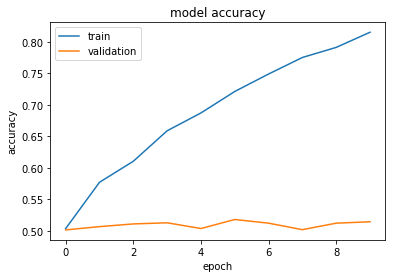

In [6]:
# summarize history for accuracy
plt.plot(history1['acc'])
plt.plot(history1['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

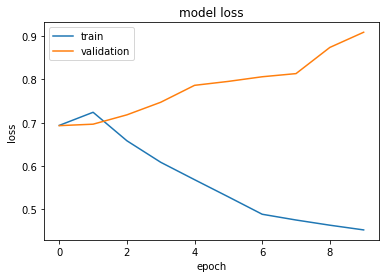

In [7]:
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()